In [1129]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from datetime import datetime
from datetime import date
from datetime import time
import matplotlib.pyplot as plt

#for weekday names and month names i might use abbravation: list(calendar.day_name)
import calendar

#to measure hourly daily frequencies
from collections import Counter

#### alternative json reading method

In [1130]:
'''
with open('ultimate_data_challenge.json') as f:
  data = json.load(f)
'''

"\nwith open('ultimate_data_challenge.json') as f:\n  data = json.load(f)\n"

In [1148]:
log=pd.read_json('logins.json')

# part I  Exploratory data analysis

In [1149]:
log.columns

Index(['login_time'], dtype='object')

In [1150]:
log.sample(5)

,login_time
41565,1970-02-24 11:54:24
58862,1970-03-14 02:01:06
48261,1970-03-03 19:24:51
60754,1970-03-15 03:27:57
62842,1970-03-17 00:33:18


In [1151]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


#### sort and login times with 15 min interval

In [1152]:
log['count'] = 1
log.sort_index(inplace=True)
log_aggregated=pd.DataFrame(log.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()).reset_index()
log_aggregated.sample(10)

,login_time,count
692,1970-01-09 01:00:00,17
2777,1970-01-30 18:15:00,10
7397,1970-03-19 21:15:00,12
2665,1970-01-29 14:15:00,7
2898,1970-02-01 00:30:00,17
6934,1970-03-15 01:30:00,24
6594,1970-03-11 12:30:00,18
8791,1970-04-03 09:45:00,12
671,1970-01-08 19:45:00,1
1952,1970-01-22 04:00:00,1


In [1153]:
''' another 15minute resempling method

df.resample('15T').asfreq()
'''

" another 15minute resempling method\n\ndf.resample('15T').asfreq()\n"

In [1154]:
#log_agg.set_index('login_time', inplace=True)

In [1155]:
log_aggregated.isna().sum()

login_time    0
count         0
dtype: int64

In [1156]:
log_aggregated.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


visualize and observer if there is a correlation with days, i might use it during analyzing

In [1157]:
log_aggregated['days']=log_aggregated['login_time'].dt.day_name()
log_aggregated['days'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [1158]:
#week day names from unique values
days=log_aggregated['days'].unique()
days

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

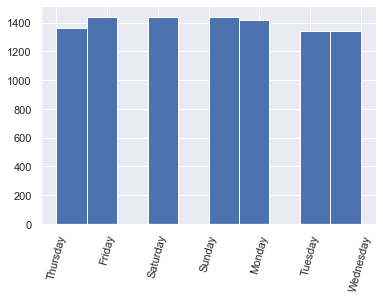

In [1159]:
#use days variable as xticks
log_aggregated['days'].hist()
plt.xticks(rotation = 75)

visualize and observer if there is a pattern in hours like during midnight,in the morning...

In [1160]:
log_aggregated['hours']=log_aggregated['login_time'].dt.hour


<AxesSubplot:>

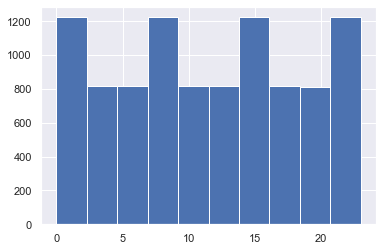

In [1161]:
log_aggregated['hours'].hist()

yes! in the morning there are less demand than in the evening. the demand becomes the highest midnights

#### i tried to plot "daiyly usage" or "hourly usage" freq, but couldn't. please help !

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

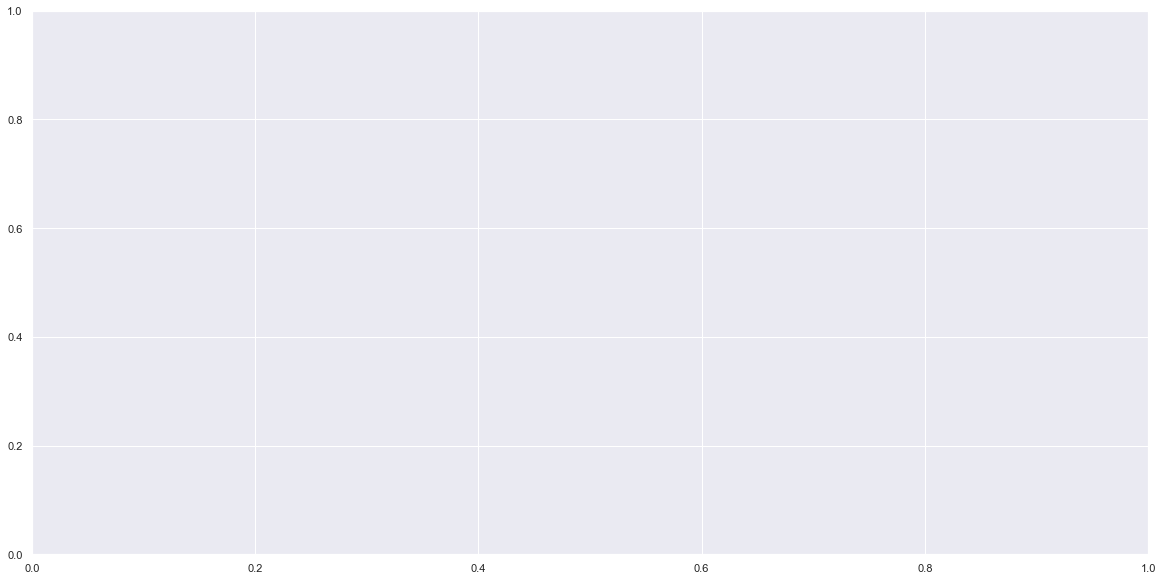

In [1162]:
plt.figure(figsize=(20, 10))
plt.bar(Counter(log_aggregated['hours']), log_aggregated['hours'].unique, color='grey') 
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Hours Plot')
sns.set()

In [ ]:
log_aggregated['count'].plot()
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

In [ ]:
log_aggregated.rolling(window=500).mean().plot()
plt.show()

there is definitly an upward trend. that's why i need to draw slope line

when we limit the date interval with only one month, we see that there are small discrete waves and we assume they are weekends because there are nearly 4 of them in a month.

let's do the same for one day and see daily logins 

In [1163]:
log_aggregated.head()

,login_time,count,days,hours
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


why this line is not working?

In [1164]:
log_aggregated['login_time'].dt.date.loc['1970-02-02':'1970-02-03' ]

Series([], Name: login_time, dtype: object)

now let's see overall smoothed app usage rolling sums together with un smoothed data for 1 week

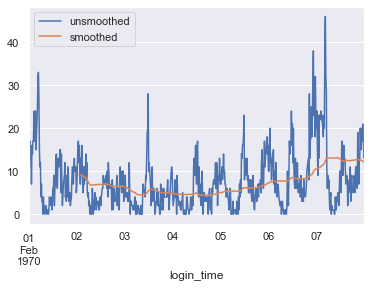

In [1165]:
unsmoothed = login_times_agg['count'].loc['1970-02-01':'1970-02-07']
smoothed = unsmoothed.rolling(window=100).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

In [1166]:
login_times_agg.columns

Index(['count', 'hour', 'index', 'day/night'], dtype='object')

let's check login hours distribution

In [1167]:
log_aggregated

,login_time,count,days,hours
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21
...,...,...,...,...
9783,1970-04-13 17:45:00,5,Monday,17
9784,1970-04-13 18:00:00,5,Monday,18
9785,1970-04-13 18:15:00,2,Monday,18
9786,1970-04-13 18:30:00,7,Monday,18


let's check dtypes

In [1168]:
log_aggregated.dtypes

login_time    datetime64[ns]
count                  int64
days                  object
hours                  int64
dtype: object

let's see if we can see login hours

In [1169]:
hours=log_aggregated['hours']

now use histogram to see most active days and hours

Text(0.5, 1.0, 'Hours Plot')

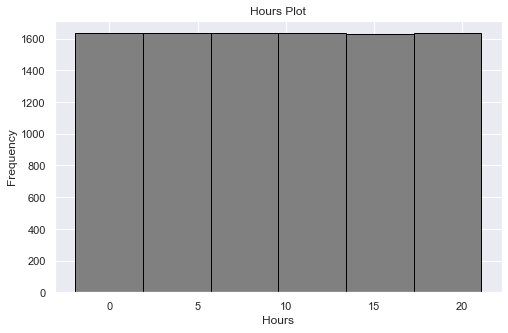

In [1170]:
fig = plt.figure(figsize=(8,5))
plt.hist(hours, color='grey', bins=6, align='left', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Hours Plot')

<AxesSubplot:xlabel='login_time'>

<Figure size 1224x288 with 0 Axes>

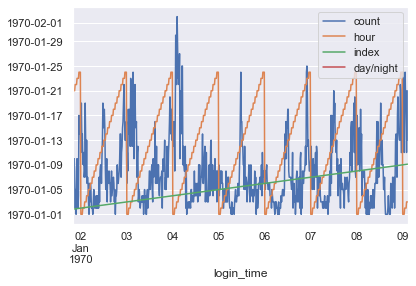

In [1171]:
plt.figure(figsize=(17,4))# 1st week plot
login_times_agg[0:700].plot()

In [1172]:
day_night = lambda row: "D" if row in range(7,20) else "N"
log_aggregated["day/night"] = log_aggregated['hours'].apply(day_night)
log_aggregated.head() 

,login_time,count,days,hours,day/night
0,1970-01-01 20:00:00,2,Thursday,20,N
1,1970-01-01 20:15:00,6,Thursday,20,N
2,1970-01-01 20:30:00,9,Thursday,20,N
3,1970-01-01 20:45:00,7,Thursday,20,N
4,1970-01-01 21:00:00,1,Thursday,21,N


i might use this method somewhere

In [1173]:
#login_times_agg.groupby(login_times_agg["index"].dt.day)[['count']].mean()

# part II Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. i would use "total tall" statistics as metric. if usage of bridge is same with the usage before the experiment started, that means it didn't work. if it works we expect an increase in tall revenue
2. 

a-before starting experiment i would follow monthly tall revenue.and after experiment started, i would continue tracking tall revenue. 

b-Calculate Z-score of average frequency of drivers serving both cities, post-reimbursement experiment.
A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

c-let's see feature importance with heatmap

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


In [1174]:
udt=pd.read_json('ultimate_data_challenge.json')

In [1175]:
udt.sample(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
12381,Astapor,1,2014-01-07,4.0,1.00,2014-01-07,iPhone,0.0,True,100.0,2.27,4.0
38724,Winterfell,0,2014-01-17,5.0,1.00,2014-05-28,Android,0.0,False,50.0,16.63,5.0
3018,Winterfell,0,2014-01-17,NaN,1.00,2014-03-16,Android,0.0,True,0.0,15.66,5.0
24023,King's Landing,1,2014-01-22,5.0,1.00,2014-01-22,iPhone,0.0,False,100.0,14.34,5.0
4858,King's Landing,0,2014-01-23,4.0,1.00,2014-06-25,iPhone,0.0,False,50.0,6.09,4.8
32501,Astapor,0,2014-01-06,5.0,1.00,2014-06-18,Android,0.0,False,50.0,4.13,5.0
25991,Astapor,6,2014-01-09,5.0,1.25,2014-06-09,Android,25.0,False,58.3,2.57,4.7
20520,Astapor,1,2014-01-26,5.0,2.00,2014-01-31,iPhone,100.0,False,100.0,1.67,5.0
44851,Astapor,5,2014-01-30,4.2,1.07,2014-06-23,Android,9.5,False,57.1,3.44,4.7
39352,Winterfell,3,2014-01-04,2.5,1.00,2014-06-28,iPhone,0.0,True,28.6,4.20,4.7


In [1176]:
udt.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

i will try to fill missing avg ratings with average of non-missing values for that city

In [1177]:
#valvulate average driver rating of each cities to use for missing values and fill them using transform
udt['avg_rating_of_driver'] = udt.groupby('city').transform(lambda x: x.fillna(x.mean()))

In [1178]:
udt.isna().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver      201
dtype: int64

In [1179]:
print('number of users: ',len(udt))

number of users:  50000


### Modeling

weekday_pct: the percent of the user’s trips occurring during a weekday
and
avg_dist: the average distance in miles per trip taken in the first 30 days after signup
they seem somehow correlated. i think we can build a relationship between these variables, and model them to predict something.
for example my claim is "the greater the average distance in the first month, the higher the number of trips" which is pretty understandable and predictible.

In [ ]:
#let's import possible useful libraries
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

labelencoder will help grouping cities

In [1184]:
LE = LabelEncoder()
udt['city_code'] = LE.fit_transform(udt['city'])

In [1185]:
udt['black_user_code']=LE.fit_transform(udt['ultimate_black_user'])

In [1186]:
udt['phone_code'] = LE.fit_transform(udt['phone'])

In [1188]:
udt.sample(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_code,black_user_code,phone_code
2475,King's Landing,0,2014-01-28,0,1.0,2014-06-12,iPhone,0.0,True,100.0,5.29,4.6,1,1,1
16495,Winterfell,1,2014-01-04,1,1.0,2014-02-02,Android,0.0,False,0.0,2.40,5.0,2,0,0
23539,Winterfell,3,2014-01-26,3,1.0,2014-03-15,Android,0.0,False,40.0,2.83,4.8,2,0,0
46784,Astapor,1,2014-01-10,1,1.0,2014-01-25,Android,0.0,False,0.0,39.39,5.0,0,0,0
6829,Astapor,2,2014-01-06,2,1.0,2014-01-15,iPhone,0.0,True,50.0,5.55,5.0,0,1,1


In [1215]:
udt.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver       object
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
city_code                   int32
black_user_code             int64
phone_code                  int32
dtype: object

convert last_trip_date and signup_date to date_time

In [1219]:
udt[['last_trip_date','signup_date']]=udt[['last_trip_date','signup_date']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

drop phone,ultimate_black_userm,city columns to prevent wrong correlations

In [1209]:
new_udt=udt.drop(['city','phone','ultimate_black_user'], axis=1)

let's see how many different cities we have

In [1210]:
new_udt['city_code'].unique()

array([1, 0, 2])

In [1221]:
correlation = new_udt.corr()
correlation

,trips_in_first_30_days,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_code,black_user_code,phone_code
trips_in_first_30_days,1.000000,-0.001841,0.005720,0.050388,-0.136329,-0.039115,0.053888,0.112210,0.058128
avg_surge,-0.001841,1.000000,0.793582,-0.110071,-0.081491,0.010597,-0.035441,-0.078791,0.006574
surge_pct,0.005720,0.793582,1.000000,-0.144918,-0.104414,0.020103,-0.061317,-0.106861,0.007144
weekday_pct,0.050388,-0.110071,-0.144918,1.000000,0.101652,0.020442,-0.003040,0.035998,0.011370
avg_dist,-0.136329,-0.081491,-0.104414,0.101652,1.000000,0.080540,0.041204,0.032310,-0.016087
avg_rating_by_driver,-0.039115,0.010597,0.020103,0.020442,0.080540,1.000000,-0.073287,0.009343,-0.007132
city_code,0.053888,-0.035441,-0.061317,-0.003040,0.041204,-0.073287,1.000000,-0.040722,0.002099
black_user_code,0.112210,-0.078791,-0.106861,0.035998,0.032310,0.009343,-0.040722,1.000000,0.081760
phone_code,0.058128,0.006574,0.007144,0.011370,-0.016087,-0.007132,0.002099,0.081760,1.000000


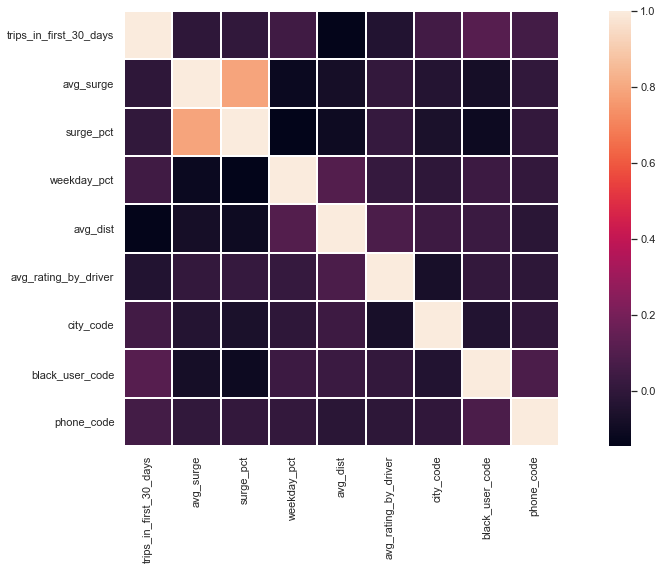

In [1222]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
sns.heatmap(correlation, linewidth=1, linecolor='w', square=True)
plt.show()

In [1223]:
X=new_udt

In [1224]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: '2014-01-25'